In [326]:
import pandas as pd
import os 
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
from nltk.tokenize import word_tokenize
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import f1_score,roc_curve,auc

In [327]:
print(os.listdir('../input/'))

['sarcasam.csv', 'Sarcasm_Headlines_Dataset.json']


In [328]:
df = pd.read_csv('../input/sarcasam.csv')
df.head()

,ID,tweet,label
0,T000452358,b'oh yea that makes sense ',sarcastic
1,T000452359,Estas enfermedad a un cargo poltico tu como pb...,sarcastic
2,T000452360,@alleygirl2409 until i\'m and all the old men ...,sarcastic
3,T000452361,"b""@sarinas it had been chanted peacefully you ...",sarcastic
4,T000452362,"b""there's nothing like being on vacation and h...",sarcastic


In [329]:
df.drop(['ID'],inplace = True, axis = 1)

In [330]:
df.head()

,tweet,label
0,b'oh yea that makes sense ',sarcastic
1,Estas enfermedad a un cargo poltico tu como pb...,sarcastic
2,@alleygirl2409 until i\'m and all the old men ...,sarcastic
3,"b""@sarinas it had been chanted peacefully you ...",sarcastic
4,"b""there's nothing like being on vacation and h...",sarcastic


In [331]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91298 entries, 0 to 91297
Data columns (total 2 columns):
tweet    91298 non-null object
label    91298 non-null object
dtypes: object(2)
memory usage: 1.4+ MB


In [332]:
# no null values

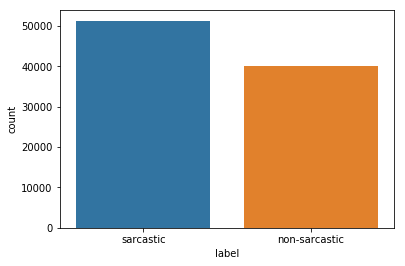

In [333]:
sns.countplot(df['label'])

In [334]:
stop_words = stopwords.words('english')
wordnet_lemmatizer = WordNetLemmatizer()

In [335]:
def process(x):
    x = re.sub(r'^\w*','', x)
    token_list = word_tokenize(x)
    new_list = [w.lower() for w in token_list if w not in string.punctuation]
    new_list = [w for w in new_list if w not in stop_words]
    new_list = [w for w in new_list if w.isalpha()]
    new_list = [wordnet_lemmatizer.lemmatize(w) for w in new_list]
    return " ".join(new_list )

In [336]:
df['tweet'] = df['tweet'].apply(process)

In [337]:
df.head()

,tweet,label
0,yea make sense,sarcastic
1,enfermedad un cargo poltico tu como pblico jes...,sarcastic
2,old men finally date sarcasmsun mar ist,sarcastic
3,sarinas chanted peacefully ca deny hypocrisysa...,sarcastic
4,nothing like vacation homework,sarcastic


In [338]:
# reshuffling whole dataframe
df = df.sample(frac=1).reset_index(drop = True)

In [339]:
df.head()

,tweet,label
0,love saturday class mean come like last place ...,sarcastic
1,fuck wish spend money mom gave shopping cause ...,sarcastic
2,shit say,sarcastic
3,cant wait school tomorrow,sarcastic
4,hashtag yes,non-sarcastic


In [340]:
df['len'] = df['tweet'].apply(lambda x : len(x))

In [341]:
df.head()

,tweet,label,len
0,love saturday class mean come like last place ...,sarcastic,52
1,fuck wish spend money mom gave shopping cause ...,sarcastic,77
2,shit say,sarcastic,8
3,cant wait school tomorrow,sarcastic,25
4,hashtag yes,non-sarcastic,11


In [342]:
df['len'].value_counts()

21      1828
25      1802
26      1801
31      1791
23      1786
22      1783
30      1777
29      1757
33      1751
27      1749
28      1744
24      1732
34      1708
19      1702
20      1692
18      1685
32      1678
46      1665
37      1657
35      1647
36      1627
41      1601
42      1601
38      1593
17      1585
40      1572
39      1547
43      1532
16      1513
45      1497
        ... 
273        1
209        1
528        1
336        1
208        1
591        1
399        1
207        1
410        1
155        1
420        1
219        1
292        1
228        1
867        1
545        1
353        1
289        1
1376       1
544        1
224        1
160        1
671        1
223        1
159        1
541        1
191        1
348        1
283        1
285        1
Name: len, Length: 340, dtype: int64

<BarContainer object of 340 artists>

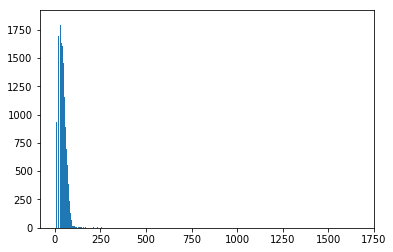

In [343]:
plt.bar(df['len'].value_counts().index, df['len'].value_counts().values)

In [344]:
df.shape

(91298, 3)

<BarContainer object of 295 artists>

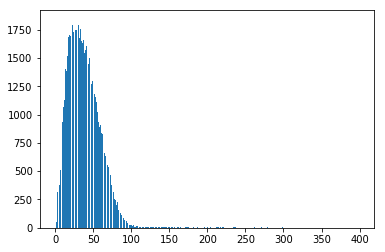

In [345]:
df = df[df['len'] < 400]
plt.bar(df['len'].value_counts().index, df['len'].value_counts().values)

<BarContainer object of 199 artists>

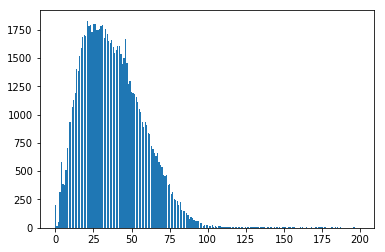

In [346]:
df = df[df['len'] < 200]
plt.bar(df['len'].value_counts().index, df['len'].value_counts().values)

<BarContainer object of 100 artists>

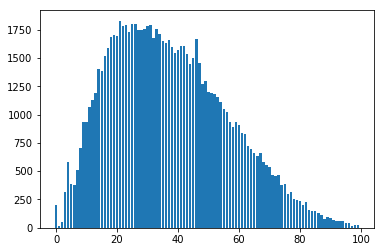

In [347]:
df = df[df['len'] < 100]
plt.bar(df['len'].value_counts().index, df['len'].value_counts().values)

In [348]:
df['label'].replace({'sarcastic': 1, 'non-sarcastic':0}, inplace = True)
df.head()

,tweet,label,len
0,love saturday class mean come like last place ...,1,52
1,fuck wish spend money mom gave shopping cause ...,1,77
2,shit say,1,8
3,cant wait school tomorrow,1,25
4,hashtag yes,0,11


In [349]:
tf = TfidfVectorizer(analyzer='word', ngram_range=(1,3), max_features= 5000)
X = tf.fit_transform(df['tweet'])
y = df['label']

In [350]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [351]:
nb = BernoulliNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
f1_score(y_pred, y_test)

0.8538771701822787

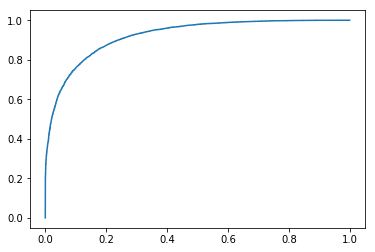

In [352]:
proba = nb.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, proba)

auc_val = auc(fpr,tpr)
plt.plot(fpr, tpr)

In [353]:
from sklearn.linear_model import SGDClassifier

In [354]:
model = SGDClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
f1_score(y_pred, y_test)

C:\Users\shoai\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.8605696202531646

In [355]:
from sklearn.svm import LinearSVC

In [356]:
model = LinearSVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
f1_score(y_pred, y_test)

0.8608782887285201

In [357]:
from sklearn.ensemble import RandomForestClassifier

In [358]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
f1_score(y_pred, y_test)

C:\Users\shoai\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8385648744100076